In [1]:
import pandas as pd
from pycaret.classification import *
from pycaret.classification import ClassificationExperiment
from lightgbm import LGBMClassifier
exp = ClassificationExperiment()


data = pd.read_csv('../../data/dataset.csv')

data.head()

s = setup(data, target = 'signal', session_id = 123, use_gpu=True)
# best = compare_models(exclude=['gbc'])
best = create_model(LGBMClassifier())


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDAP=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDAP=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDAP=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDAP=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDAP=1


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDAP=1


,Description,Value
0,Session id,123
1,Target,signal
2,Target type,Multiclass
3,Target mapping,"dont_trade: 0, long: 1, short: 2"
4,Original data shape,"(26249, 210)"
5,Transformed data shape,"(26249, 210)"
6,Transformed train set shape,"(18374, 210)"
7,Transformed test set shape,"(7875, 210)"
8,Numeric features,209
9,Rows with missing values,100.0%


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDAP=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDAP=1


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8923,0.9756,0.8923,0.8917,0.8917,0.8380,0.8382
1,0.8847,0.9755,0.8847,0.8841,0.8835,0.8265,0.8273
2,0.9010,0.9775,0.9010,0.9006,0.9002,0.8510,0.8516
3,0.8955,0.9746,0.8955,0.8953,0.8953,0.8429,0.8430
4,0.8933,0.9745,0.8933,0.8928,0.8928,0.8395,0.8397
5,0.8813,0.9722,0.8813,0.8807,0.8808,0.8215,0.8217
6,0.8857,0.9773,0.8857,0.8850,0.8849,0.8281,0.8285
7,0.9064,0.9797,0.9064,0.9062,0.9054,0.8591,0.8600
8,0.9091,0.9797,0.9091,0.9087,0.9086,0.8633,0.8636


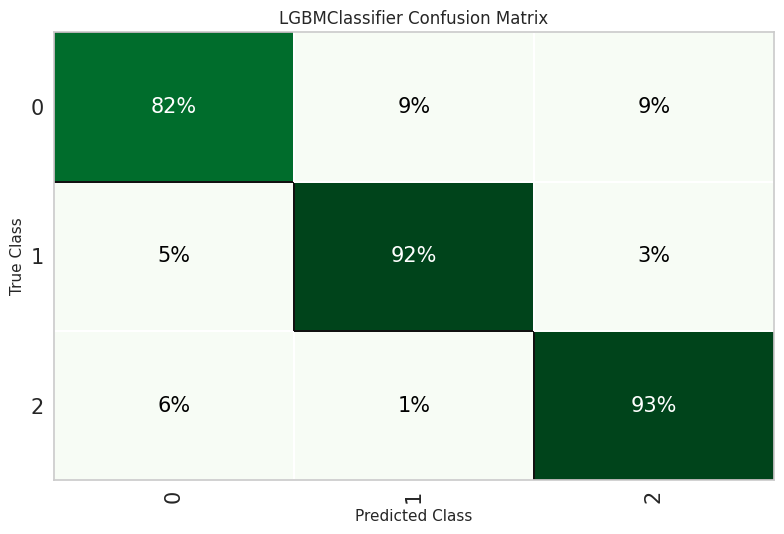

In [2]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix', plot_kwargs = {'percent': True})

In [3]:
# save pipeline
model_name = 'ETHUSDT-15m-12-3'
save_model(best, f'../../models/{model_name}')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['ABER_ZG_5_15', 'ABER_SG_5_15',
                                              'ABER_XG_5_15', 'ABER_ATR_5_15',
                                              'ACCBL_20', 'ACCBM_20', 'ACCBU_20',
                                              'AD', 'ADOSC_3_10', 'ADX_14',
                                              'DMP_14'...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, importance_type='split',
                                 learning_rate=0.1, max_depth=-1,
                                 min_child_samples=20, min_child_weight=0.00

In [28]:
import pandas as pd
from pycaret.classification import load_model, predict_model



model_name = 'ETHUSDT-15m-12-3'
model = load_model(f'../../models/{model_name}')
# Load trained Pipeline
# model = load_model("loaded_best_pipeline_api")

df = pd.read_csv('../../data/dataset.csv')
predictions = predict_model(model, data=df[-6888:-6887])
result = {"prediction": predictions["prediction_label"].iloc[0], "prediction_score": predictions["prediction_score"].iloc[0]}
print(result)


Transformation Pipeline and Model Successfully Loaded


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,1.0000,0,1.0000,1.0000,1.0000,nan,0.0000


{'prediction': 'long', 'prediction_score': 0.9942}


In [ ]:
import pandas as pd
from pycaret.classification import load_model, predict_model



# Load trained Pipeline
model_name = 'ETHUSDT-15m-12-3'
model = load_model(f'../../models/{model_name}')

df = pd.read_csv('../../data/dataset.csv')
for i in range(1,10,1):
    data=df[i:i+1]
    correct_predition = list(data['signal'])[0]
    predictions = predict_model(model, data)
    result = {"prediction": predictions["prediction_label"].iloc[0], "prediction_score": predictions["prediction_score"].iloc[0]}
    print('correct_predition', correct_predition, 'bot predictions', result['prediction'], 'prediction_score', result['prediction_score'])

In [37]:
list(data['signal'])[0]

'long'

In [ ]:
# plot AUC
plot_model(best, plot = 'feature_all')